<a href="https://colab.research.google.com/github/peterjsadowski/ics235/blob/master/02_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Working with Data

First, we need to download the data. The following code uses the numpy library to download data from a website. Numpy is a powerful library for mathematical operations on vectors and matrices.


In [30]:
import numpy

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
features = numpy.loadtxt(url, delimiter=',', usecols=[0,1,2,3]) 
labels = numpy.loadtxt(url, delimiter=',', usecols=[4], dtype=numpy.str)

In [31]:
print("Dataset shape: ", features.shape)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']

Dataset shape:  (150, 4)


## Example data manipulations in Numpy

In [34]:
# Slices
features[0:3, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
# Array operations
a = numpy.array([[0,1], [2,3]])
b = a + a
b[0,0] = 10
print(numpy.dot(a,b))

In [73]:
# Use numpy functions to randomly permute examples.
random_ordering = numpy.random.permutation(features.shape[0])
labels = labels[random_ordering]
features = features[random_ordering]

labels_unique, y = numpy.unique(labels, return_inverse=True)
print('Unique labels: ', labels_unique)
print('Labels as ints: ', y) 

Unique labels:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Labels as ints:  [0 2 2 1 2 2 1 0 0 1 2 2 2 0 0 2 2 2 0 0 0 2 0 2 1 2 1 2 2 1 0 1 0 0 1 2 2
 1 0 0 1 0 0 1 0 0 1 2 0 2 2 1 0 2 2 1 1 2 2 2 1 2 0 0 1 2 0 1 1 2 1 2 0 2
 1 0 1 1 0 0 0 0 2 2 2 1 0 1 2 1 1 1 0 2 0 2 0 1 2 0 1 0 0 1 1 2 0 0 1 2 0
 1 1 0 2 0 0 1 2 2 0 1 1 1 1 2 0 1 1 0 1 1 2 0 1 2 1 0 1 2 1 2 2 2 0 1 0 1
 0 2]


In [75]:
# More sophisticated matrix operations. (Linear Regression)
X = numpy.hstack([features, numpy.ones((features.shape[0], 1))])
XXinv = numpy.linalg.inv( numpy.dot(X.T, X))
b = numpy.dot(XXinv, numpy.dot(X.T, y))
print('Linear regression coefficients: ', b)

Linear regression coefficients:  [-0.1387268  -0.00264492  0.04622575 -0.0897789   1.7525723 ]


You are asked to implement the following functions.

Jupyter notebooks enable us to plot directly in the notebook. We use the pyplot library. 

(4.12, 8.08, 1.88, 4.5200000000000005)

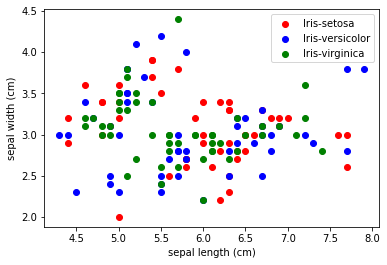

In [76]:
import matplotlib.pyplot as plt
X = features
Y = labels
# Plot the points in the first two dimensions.
plt.scatter(X[Y=='Iris-setosa', 0], X[Y=='Iris-setosa', 1], color='red', label='Iris-setosa')
plt.scatter(X[Y=='Iris-versicolor', 0], X[Y=='Iris-versicolor', 1], color='blue', label='Iris-versicolor')
plt.scatter(X[Y=='Iris-virginica', 0], X[Y=='Iris-virginica', 1], color='green', label='Iris-virginica')
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')